In [1]:
import sklearn
print(sklearn.__version__)

1.8.0


In [2]:
#pip install -U scikit-learn

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import merged dataset
merged_data = pd.read_csv("C:/Users/HP/Desktop/Dafe/DS_Projects/FNOL_Insurance/data/processed/merged_data.csv")

In [5]:
merged_data.head()

,Claim_ID,Policy_ID,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,...,Gender,Occupation,Region,Annual_Mileage,Driving_Experience_Years,Vehicle_Type,Vehicle_Age,Credit_Score_Band,ThirdParty_Role,TP_Injury_Severity
0,CLM30000,POL14506,2019-12-19,2019-12-19,Theft,Medium,False,True,5243,2808.0,...,Female,Retired,Glasgow,4891,34,Hatchback,6,Excellent,Pedestrian,Minor
1,CLM30001,POL14338,2018-12-30,2018-12-31,Collision,Low,False,False,3934,2952.0,...,Female,Employed,Newcastle,18408,23,Van,9,Fair,Unknown,No Injury
2,CLM30002,POL13575,2021-10-19,2021-10-19,Other,Medium,False,False,153631,156497.0,...,Female,Unemployed,Newcastle,10793,0,SUV,5,Excellent,Passenger,Minor
3,CLM30003,POL10138,2021-06-18,2021-06-18,Weather,Low,False,False,2812,1450.0,...,Male,Employed,Newcastle,9405,5,Hatchback,13,Good,Unknown,No Injury
4,CLM30004,POL12316,2021-03-21,2021-03-24,Theft,Low,False,False,5094,4243.0,...,Female,Unemployed,Leeds,16729,9,Hatchback,12,Excellent,Unknown,No Injury


In [6]:
# Calculae the days between accident date and settlement date

merged_data['Accident_Settlement_days'] = (pd.to_datetime(merged_data['Settlement_Date']) - pd.to_datetime(merged_data['Accident_Date'])).dt.days

merged_data[['Accident_Date', 'Settlement_Date', 'Accident_Settlement_days']].head()

,Accident_Date,Settlement_Date,Accident_Settlement_days
0,2019-12-19,2020-03-01,73
1,2018-12-30,2019-03-23,83
2,2021-10-19,2022-04-22,185
3,2021-06-18,2021-09-13,87
4,2021-03-21,2021-05-26,66


In [7]:
# days to FNOL calculation

merged_data['days_to_fnol'] = (pd.to_datetime(merged_data['FNOL_Date']) - pd.to_datetime(merged_data['Accident_Date'])).dt.days

merged_data[['Accident_Date', 'FNOL_Date', 'days_to_fnol']].head()

,Accident_Date,FNOL_Date,days_to_fnol
0,2019-12-19,2019-12-19,0
1,2018-12-30,2018-12-31,1
2,2021-10-19,2021-10-19,0
3,2021-06-18,2021-06-18,0
4,2021-03-21,2021-03-24,3


In [8]:
# Driver Risk Profile

merged_data['driver_risk_score'] = (
    (merged_data['Age_of_Driver'] < 25).astype(int) +
    (merged_data['Driving_Experience_Years'] < 5).astype(int)
)


In [9]:
merged_data['driver_risk_score'].value_counts()

driver_risk_score
0    7464
2     809
1     140
Name: count, dtype: int64

In [10]:
# Vehicle Risk

merged_data['vehicle_risk'] = np.where(merged_data['Vehicle_Age'] > 10, 1, 0)


In [11]:
# Log Transformation of Target Variable (Ultimate_Claim_Amount)

merged_data['log_claim_amount'] = np.log1p(merged_data['Ultimate_Claim_Amount'])
merged_data[['Ultimate_Claim_Amount', 'log_claim_amount']].head()


,Ultimate_Claim_Amount,log_claim_amount
0,2808.0,7.940584
1,2952.0,7.990577
2,156497.0,11.960799
3,1450.0,7.280008
4,4243.0,8.353261


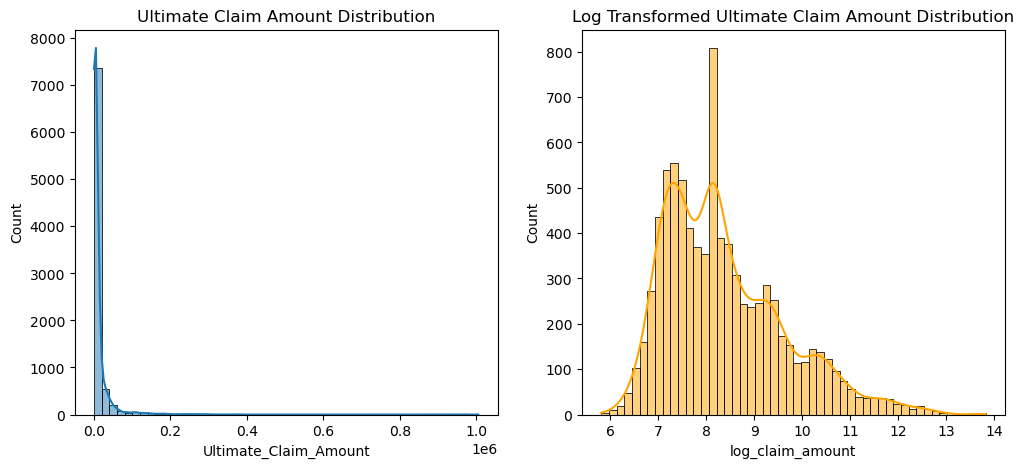

In [12]:
# Visualization of ultimate claim amount distribution before and after log transformation

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(merged_data['Ultimate_Claim_Amount'], bins=50, kde=True)
plt.title('Ultimate Claim Amount Distribution')
plt.subplot(1, 2, 2)
sns.histplot(merged_data['log_claim_amount'], bins=50, kde=True, color='orange')
plt.title('Log Transformed Ultimate Claim Amount Distribution')
plt.show()

In [13]:
merged_data.columns

Index(['Claim_ID', 'Policy_ID', 'Accident_Date', 'FNOL_Date', 'Claim_Type',
       'Claim_Complexity', 'Fraud_Flag', 'Litigation_Flag',
       'Estimated_Claim_Amount', 'Ultimate_Claim_Amount', 'Severity_Band',
       'Settlement_Date', 'Status', 'Customer_ID', 'Age_of_Driver', 'Gender',
       'Occupation', 'Region', 'Annual_Mileage', 'Driving_Experience_Years',
       'Vehicle_Type', 'Vehicle_Age', 'Credit_Score_Band', 'ThirdParty_Role',
       'TP_Injury_Severity', 'Accident_Settlement_days', 'days_to_fnol',
       'driver_risk_score', 'vehicle_risk', 'log_claim_amount'],
      dtype='object')

In [14]:
merged_data.select_dtypes(include=['object', 'category']).columns

Index(['Claim_ID', 'Policy_ID', 'Accident_Date', 'FNOL_Date', 'Claim_Type',
       'Claim_Complexity', 'Severity_Band', 'Settlement_Date', 'Status',
       'Customer_ID', 'Gender', 'Occupation', 'Region', 'Vehicle_Type',
       'Credit_Score_Band', 'ThirdParty_Role', 'TP_Injury_Severity'],
      dtype='object')

In [15]:
# Encode Categorial variables

categorical_cols = ['Claim_Type', 'Claim_Complexity', 'Region', 'Vehicle_Type', 'Status', 'Severity_Band', 'Gender', 'Occupation', 'ThirdParty_Role', 'TP_Injury_Severity', ]
# merged_data = pd.get_dummies(merged_data, columns=categorical_cols, drop_first=True)
# merged_data.head()

In [16]:
cat_cols = merged_data[categorical_cols]

In [17]:
cat_cols

,Claim_Type,Claim_Complexity,Region,Vehicle_Type,Status,Severity_Band,Gender,Occupation,ThirdParty_Role,TP_Injury_Severity
0,Theft,Medium,Glasgow,Hatchback,settled,Minor,Female,Retired,Pedestrian,Minor
1,Collision,Low,Newcastle,Van,settled,Minor,Female,Employed,Unknown,No Injury
2,Other,Medium,Newcastle,SUV,settled,Catastrophic,Female,Unemployed,Passenger,Minor
3,Weather,Low,Newcastle,Hatchback,settled,Minor,Male,Employed,Unknown,No Injury
4,Theft,Low,Leeds,Hatchback,settled,Minor,Female,Unemployed,Unknown,No Injury
...,...,...,...,...,...,...,...,...,...,...
8408,Fire,Low,Liverpool,SUV,settled,Major,Female,Student,Unknown,No Injury
8409,Collision,Low,Bristol,SUV,settled,Minor,Female,Employed,Unknown,No Injury
8410,Theft,Low,London,Hatchback,settled,Minor,Male,Employed,Unknown,No Injury
8411,Fire,Medium,Manchester,SUV,settled,Moderate,Female,Employed,Unknown,No Injury


In [18]:
# Convert fraud_flag and litigation_flag from boolean to integer


bool_cols = merged_data.select_dtypes(include="bool").columns
merged_data[bool_cols] = merged_data[bool_cols].astype(int)

In [19]:
merged_data.select_dtypes(include=['int', 'float']).columns

Index(['Fraud_Flag', 'Litigation_Flag', 'Estimated_Claim_Amount',
       'Ultimate_Claim_Amount', 'Age_of_Driver', 'Annual_Mileage',
       'Driving_Experience_Years', 'Vehicle_Age', 'Accident_Settlement_days',
       'days_to_fnol', 'driver_risk_score', 'vehicle_risk',
       'log_claim_amount'],
      dtype='object')

In [20]:
numerical_cols = ['Estimated_Claim_Amount', 'Ultimate_Claim_Amount', 'Fraud_Flag', 'Litigation_Flag', 'Age_of_Driver', 'Vehicle_Age', 'Annual_Mileage', 'Driving_Experience_Years', 'Accident_Settlement_days', 'days_to_fnol', 'driver_risk_score', 'vehicle_risk', 'log_claim_amount']


In [21]:
num_cols = merged_data[numerical_cols]

In [22]:
num_cols

,Estimated_Claim_Amount,Ultimate_Claim_Amount,Fraud_Flag,Litigation_Flag,Age_of_Driver,Vehicle_Age,Annual_Mileage,Driving_Experience_Years,Accident_Settlement_days,days_to_fnol,driver_risk_score,vehicle_risk,log_claim_amount
0,5243,2808.0,0,1,53,6,4891,34,73,0,0,0,7.940584
1,3934,2952.0,0,0,43,9,18408,23,83,1,0,0,7.990577
2,153631,156497.0,0,0,19,5,10793,0,185,0,2,0,11.960799
3,2812,1450.0,0,0,26,13,9405,5,87,0,0,1,7.280008
4,5094,4243.0,0,0,27,12,16729,9,66,3,0,1,8.353261
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8408,128630,114922.0,0,1,38,9,11665,19,65,0,0,0,11.652018
8409,2000,1110.0,0,0,58,1,17748,39,45,1,0,0,7.013016
8410,3357,2211.0,0,0,32,7,19628,13,77,0,0,0,7.701652
8411,56032,40665.0,0,1,40,18,15456,18,189,2,0,1,10.613148


Preprocessing pipeline

In [23]:
# The standard way to join DataFrames side-by-side
df = pd.concat([num_cols, cat_cols], axis=1)

In [24]:
df

,Estimated_Claim_Amount,Ultimate_Claim_Amount,Fraud_Flag,Litigation_Flag,Age_of_Driver,Vehicle_Age,Annual_Mileage,Driving_Experience_Years,Accident_Settlement_days,days_to_fnol,...,Claim_Type,Claim_Complexity,Region,Vehicle_Type,Status,Severity_Band,Gender,Occupation,ThirdParty_Role,TP_Injury_Severity
0,5243,2808.0,0,1,53,6,4891,34,73,0,...,Theft,Medium,Glasgow,Hatchback,settled,Minor,Female,Retired,Pedestrian,Minor
1,3934,2952.0,0,0,43,9,18408,23,83,1,...,Collision,Low,Newcastle,Van,settled,Minor,Female,Employed,Unknown,No Injury
2,153631,156497.0,0,0,19,5,10793,0,185,0,...,Other,Medium,Newcastle,SUV,settled,Catastrophic,Female,Unemployed,Passenger,Minor
3,2812,1450.0,0,0,26,13,9405,5,87,0,...,Weather,Low,Newcastle,Hatchback,settled,Minor,Male,Employed,Unknown,No Injury
4,5094,4243.0,0,0,27,12,16729,9,66,3,...,Theft,Low,Leeds,Hatchback,settled,Minor,Female,Unemployed,Unknown,No Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8408,128630,114922.0,0,1,38,9,11665,19,65,0,...,Fire,Low,Liverpool,SUV,settled,Major,Female,Student,Unknown,No Injury
8409,2000,1110.0,0,0,58,1,17748,39,45,1,...,Collision,Low,Bristol,SUV,settled,Minor,Female,Employed,Unknown,No Injury
8410,3357,2211.0,0,0,32,7,19628,13,77,0,...,Theft,Low,London,Hatchback,settled,Minor,Male,Employed,Unknown,No Injury
8411,56032,40665.0,0,1,40,18,15456,18,189,2,...,Fire,Medium,Manchester,SUV,settled,Moderate,Female,Employed,Unknown,No Injury


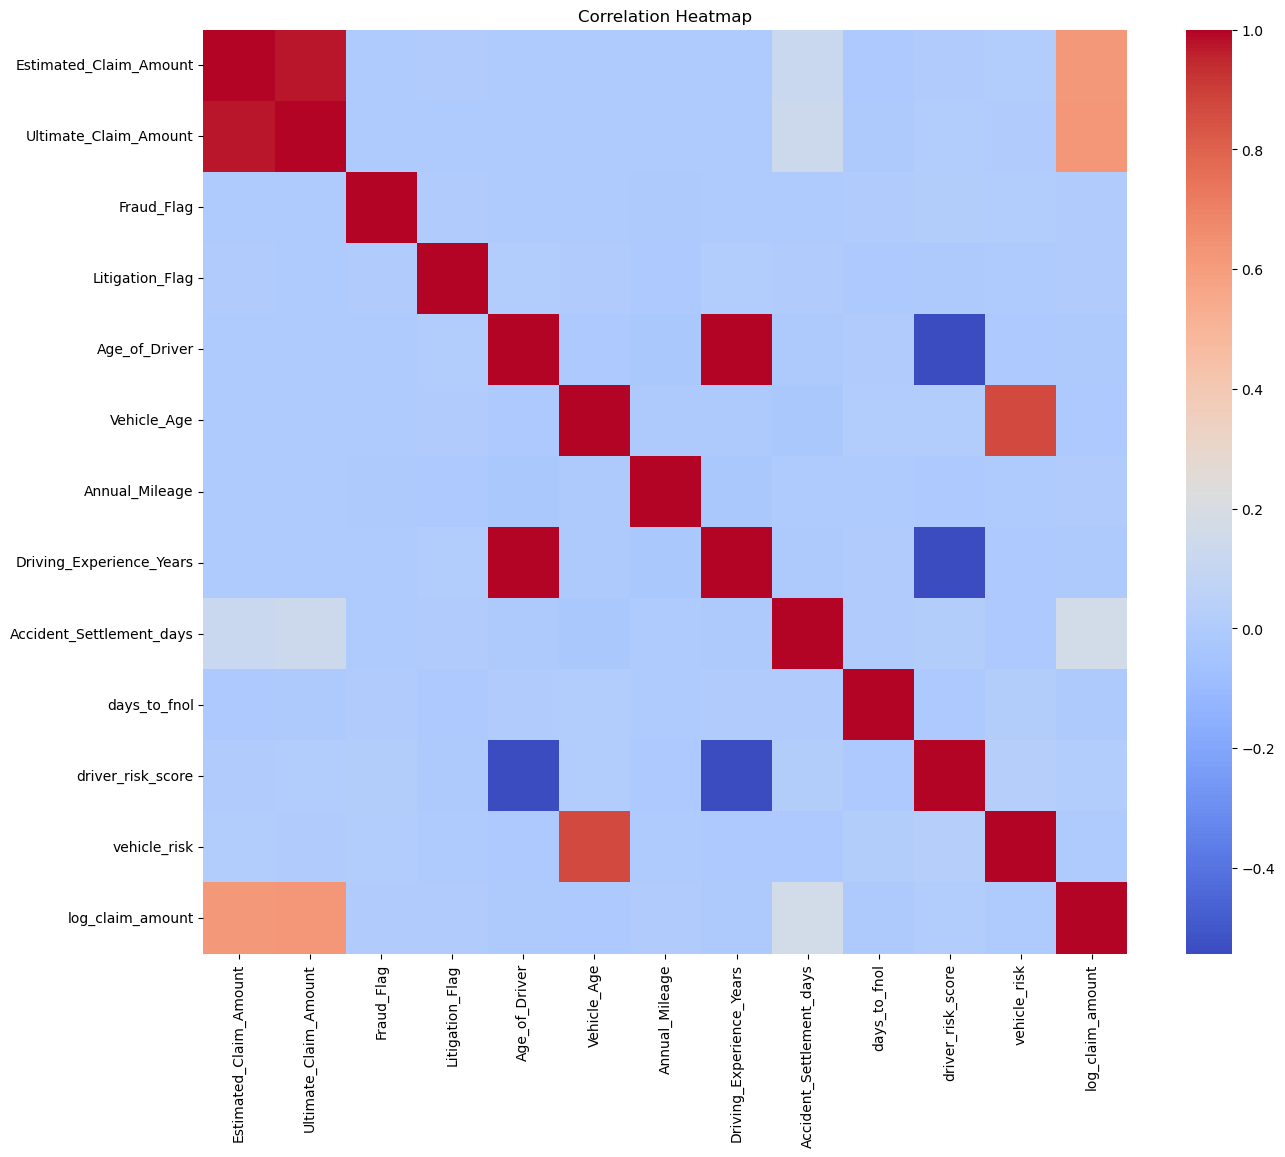

In [25]:
# Create correlation heatmap

plt.figure(figsize=(15, 12))
corr = num_cols.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
df.columns

Index(['Estimated_Claim_Amount', 'Ultimate_Claim_Amount', 'Fraud_Flag',
       'Litigation_Flag', 'Age_of_Driver', 'Vehicle_Age', 'Annual_Mileage',
       'Driving_Experience_Years', 'Accident_Settlement_days', 'days_to_fnol',
       'driver_risk_score', 'vehicle_risk', 'log_claim_amount', 'Claim_Type',
       'Claim_Complexity', 'Region', 'Vehicle_Type', 'Status', 'Severity_Band',
       'Gender', 'Occupation', 'ThirdParty_Role', 'TP_Injury_Severity'],
      dtype='object')

In [27]:


from sklearn.model_selection import train_test_split

X = df.drop(columns=['Ultimate_Claim_Amount', 'log_claim_amount'])
y = df['log_claim_amount']



In [28]:
X.columns

Index(['Estimated_Claim_Amount', 'Fraud_Flag', 'Litigation_Flag',
       'Age_of_Driver', 'Vehicle_Age', 'Annual_Mileage',
       'Driving_Experience_Years', 'Accident_Settlement_days', 'days_to_fnol',
       'driver_risk_score', 'vehicle_risk', 'Claim_Type', 'Claim_Complexity',
       'Region', 'Vehicle_Type', 'Status', 'Severity_Band', 'Gender',
       'Occupation', 'ThirdParty_Role', 'TP_Injury_Severity'],
      dtype='object')

In [29]:
y.head() 

0     7.940584
1     7.990577
2    11.960799
3     7.280008
4     8.353261
Name: log_claim_amount, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split

# 1. Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Import sklearn modules for further preprocessing if needed

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [32]:
# Define preprocessing pipeline for numerical features

numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])


In [33]:
# Define preprocessing pipeline for categorical features

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    (
        "encoder",
        OneHotEncoder(
            handle_unknown="ignore",
            sparse_output=False
            
        )
    )
])


In [34]:
# 1. Define exactly which columns are features (excluding targets)
# We want all columns in X, filtered by type
all_features = X.columns.tolist()

# Get numeric features that are actually in X
final_numeric_features = [col for col in num_cols if col in all_features]

# Get categorical features that are actually in X
final_categorical_features = [col for col in cat_cols if col in all_features]

# 2. Define the Preprocessor using these filtered lists
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, final_numeric_features),
        ("cat", categorical_pipeline, final_categorical_features)
    ]
)

# 3. Set output to pandas and transform
preprocessor.set_output(transform="pandas")

# Now this will run smoothly
X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

print("Preprocessing complete!")
print(f"Original columns: {X.shape[1]}")
print(f"Encoded columns: {X_train_final.shape[1]}")

Preprocessing complete!
Original columns: 21
Encoded columns: 58


In [35]:
# Save the splits so the Modeling notebook can see them
X_train.to_csv("C:/Users/HP/Desktop/Dafe/DS_Projects/FNOL_Insurance/data/processed/X_train.csv", index=False)
X_test.to_csv("C:/Users/HP/Desktop/Dafe/DS_Projects/FNOL_Insurance/data/processed/X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Data splits saved successfully!")

Data splits saved successfully!


In [36]:
# Save preprocessed data to be used in modelling stage

X_train_final.to_csv("C:/Users/HP/Desktop/Dafe/DS_Projects/FNOL_Insurance/data/processed/X_train_final.csv", index=False)
X_test_final.to_csv("C:/Users/HP/Desktop/Dafe/DS_Projects/FNOL_Insurance/data/processed/X_test_final.csv", index=False)
y_train.to_csv("C:/Users/HP/Desktop/Dafe/DS_Projects/FNOL_Insurance/data/processed/y_train.csv", index=False)
y_test.to_csv("C:/Users/HP/Desktop/Dafe/DS_Projects/FNOL_Insurance/data/processed/y_test.csv", index=False)


In [37]:
import joblib

# After you have run preprocessor.fit(X_train)
joblib.dump(preprocessor, 'insurance_preprocessor.joblib')

['insurance_preprocessor.joblib']